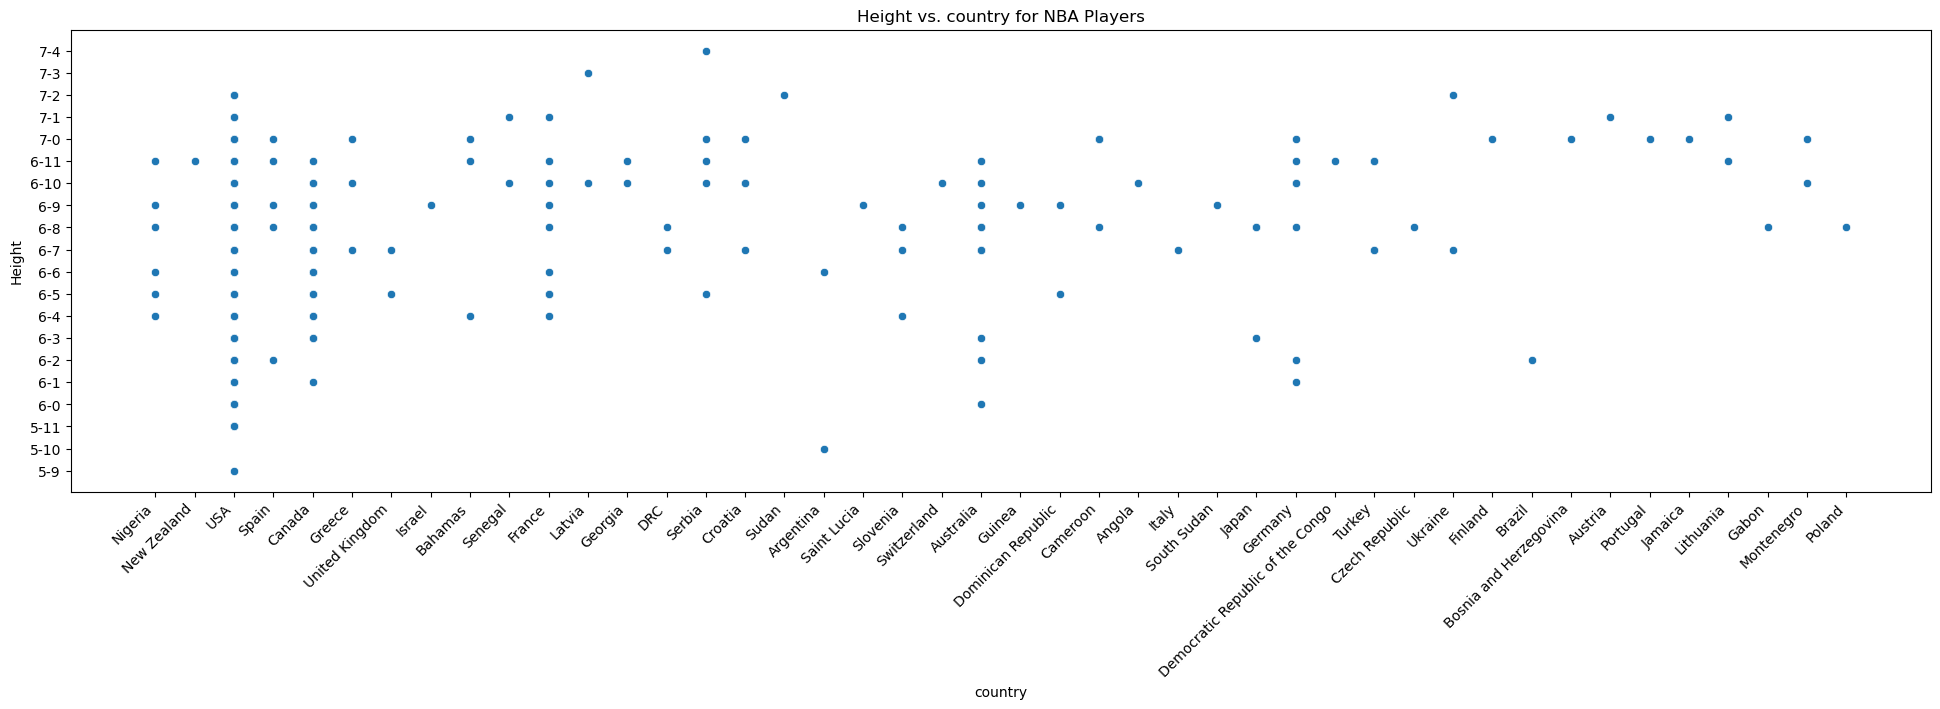

In [57]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


filepath = "players.csv"

df = pd.read_csv(filepath)

#Convert "height" column from strings to numerical values
def convert_height(height_str):
    feet, inches = map(int, height_str.split('-'))
    return (feet * 12) + inches

df['height'] = df['height'].apply(convert_height)

# Create a scatterplot to visualize the height vs. country
plt.figure(figsize=(24, 6))  # Adjust the figure size if needed
sns.scatterplot(x="country", y="height", data=df)

# Add labels to the axes and a title
plt.xlabel("country")
plt.ylabel("Height")
plt.title("Height vs. country for NBA Players")

# Add some spacing between countries by assigning a unique number to each country
unique_country = df['country'].unique()
country_mapping = {country: idx for idx, country in enumerate(unique_country)}
df['country_idx'] = df['country'].map(country_mapping)

# Customize the y-axis ticks to display heights in feet and inches
y_ticks_inches = range(int(df['height'].min()), int(df['height'].max()) + 1)
y_ticks_feet_inches = [f"{int(height/12)}-{height%12}" for height in y_ticks_inches]
plt.yticks(y_ticks_inches, y_ticks_feet_inches)

# Customize the x-axis labels by setting unique country names
plt.xticks(range(len(unique_country)), unique_country, rotation=45, ha='right')

# Show the plot
plt.show()